# <span style="color:darkblue"> Lecture 10: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda activate qtm151```

```conda install statsmodels```

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [4]:
dataset = pd.DataFrame()
dataset

""


<font size = "5">

Create two random variables of size ($n = 50$)

In [7]:
n = 50
np.random.normal(loc = 0,scale = 1, size = n)

array([ 0.25049285,  0.34644821, -0.68002472,  0.2322537 ,  0.29307247,
       -0.71435142,  1.86577451,  0.47383292, -1.1913035 ,  0.65655361,
       -0.97468167,  0.7870846 ,  1.15859558, -0.82068232,  0.96337613,
        0.41278093,  0.82206016,  1.89679298, -0.24538812, -0.75373616,
       -0.88951443, -0.81581028, -0.07710171,  0.34115197,  0.2766908 ,
        0.82718325,  0.01300189,  1.45353408, -0.26465683,  2.72016917,
        0.62566735, -0.85715756, -1.0708925 ,  0.48247242, -0.22346279,
        0.71400049,  0.47323762, -0.07282891, -0.84679372, -1.51484722,
       -0.44651495,  0.85639879,  0.21409374, -1.24573878,  0.17318093,
        0.38531738, -0.88385744,  0.15372511,  0.05820872, -1.1429703 ])

In [12]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["x"]
##two columns of 50 units, one for var x, one for var e

0     0.496714
1    -0.138264
2     0.647689
3     1.523030
4    -0.234153
5    -0.234137
6     1.579213
7     0.767435
8    -0.469474
9     0.542560
10   -0.463418
11   -0.465730
12    0.241962
13   -1.913280
14   -1.724918
15   -0.562288
16   -1.012831
17    0.314247
18   -0.908024
19   -1.412304
20    1.465649
21   -0.225776
22    0.067528
23   -1.424748
24   -0.544383
25    0.110923
26   -1.150994
27    0.375698
28   -0.600639
29   -0.291694
30   -0.601707
31    1.852278
32   -0.013497
33   -1.057711
34    0.822545
35   -1.220844
36    0.208864
37   -1.959670
38   -1.328186
39    0.196861
40    0.738467
41    0.171368
42   -0.115648
43   -0.301104
44   -1.478522
45   -0.719844
46   -0.460639
47    1.057122
48    0.343618
49   -1.763040
Name: x, dtype: float64

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [13]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [14]:
dataset["p"] = b0 + b1*dataset["x"]
#because the constant is the degree of error from the standard line

<font size = "5">

Plot the data

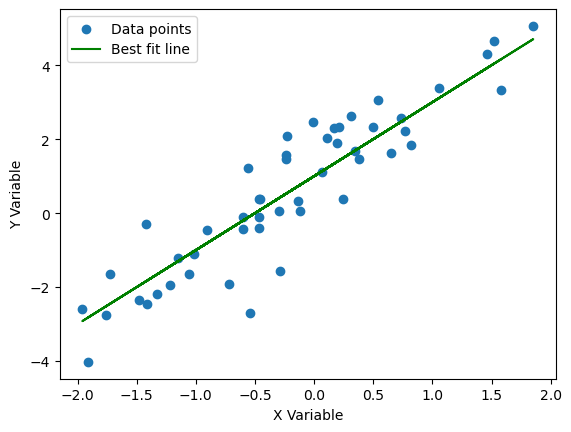

In [15]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')
#takes the variable of x and p to draw trendline

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [18]:
# Write your own code here
subset_above2 = dataset.query("y>=2")
print(len(dataset))
print(len(subset_above2))
print(len(subset_above2)/len(dataset))



50
15
0.3


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [33]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset['y'].mean()
stdv_sample = dataset['y'].std()
dataset.query("abs(y-@ybar)<=@stdv_sample")



,x,e,y,p
0,0.496714,0.324084,2.317512,1.993428
1,-0.138264,-0.385082,0.338389,0.723471
2,0.647689,-0.676922,1.618455,2.295377
4,-0.234153,1.031000,1.562693,0.531693
5,-0.234137,0.931280,1.463006,0.531726
7,0.767435,-0.309212,2.225657,2.534869
8,-0.469474,0.331263,0.392315,0.061051
10,-0.463418,-0.479174,-0.406010,0.073165
11,-0.465730,-0.185659,-0.117118,0.068540
12,0.241962,-1.106335,0.377590,1.483925


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [37]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#
#regression of y on x
model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")
#There is difference in parameter variable, as you use different covariant type
#The ols variable is the estimators for the true parameter values

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     389.2
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.14e-24
Time:                        16:36:46   Log-Likelihood:                -63.422
No. Observations:                  50   AIC:                             130.8
Df Residuals:                      48   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0410      0.122      8.533      0.000       0.802       1.280
x              2.1031      0.107     19.727      0.000       1.894       2.312
==============================================================================
Omnibus:                        3.643   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.563
Skew:                          -0.464   Prob(JB):                        0.278
Kurtosis:                       3.608   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<font size = "5">

Compute the estimated best fit line

In [41]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


In [44]:
results.params[0]

1.0410217387867964

<font size = "5">

Plot the best fit line

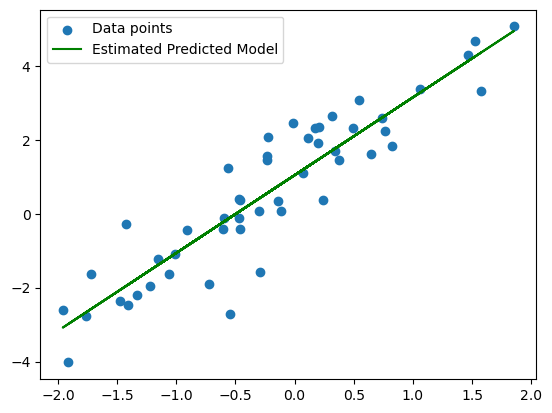

In [34]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

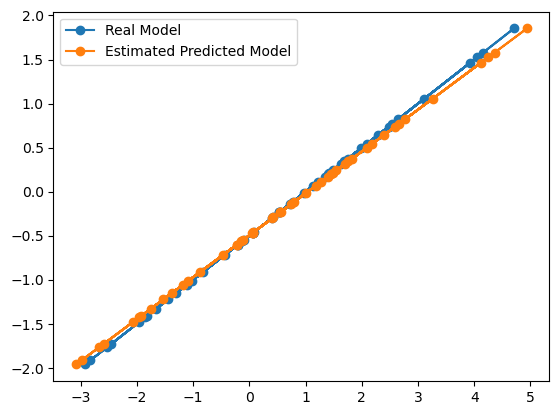

In [49]:
# Write your own code
plt.plot(dataset['p'], dataset['x'], '-o')
plt.plot(dataset['p_estimated'], dataset['x'], '-o')
plt.legend(labels = ["Real Model", "Estimated Predicted Model"])

<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [36]:
# Write your own code


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [37]:
# Write your own code
